# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mstats
from scipy import stats

from sklearn.preprocessing import RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv('/content/books.csv', on_bad_lines='skip')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Cek jumlah baris dan kolom pada dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [ ]:
df.shape

(11123, 12)

In [ ]:
df.dtypes

,0
bookID,int64
title,object
authors,object
average_rating,float64
isbn,object
isbn13,int64
language_code,object
num_pages,int64
ratings_count,int64
text_reviews_count,int64


In [ ]:
df['isbn13'] = df['isbn13'].astype('str')
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

In [ ]:
# Memperbaiki kolom num_page
df = df.rename(columns={'  num_pages' : 'num_pages'})

In [ ]:
df.dtypes

,0
bookID,int64
title,object
authors,object
average_rating,float64
isbn,object
isbn13,object
language_code,object
num_pages,int64
ratings_count,int64
text_reviews_count,int64


Menangani Missing value

In [ ]:
df.isnull().sum()

,0
bookID,0
title,0
authors,0
average_rating,0
isbn,0
isbn13,0
language_code,0
num_pages,0
ratings_count,0
text_reviews_count,0


In [ ]:
df.dropna(inplace=True)

**Analisis Distribusi dan Korelasi**

In [ ]:
df.describe()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,publication_date
count,11121.000000,11121.000000,11121.000000,1.112100e+04,11121.000000,11121
mean,21307.774301,3.934058,336.343944,1.794512e+04,542.118874,2000-08-29 03:05:33.099541504
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1900-01-01 00:00:00
25%,10270.000000,3.770000,192.000000,1.040000e+02,9.000000,1998-07-17 00:00:00
50%,20264.000000,3.960000,299.000000,7.450000e+02,47.000000,2003-03-01 00:00:00
75%,32104.000000,4.140000,416.000000,4.996000e+03,238.000000,2005-10-01 00:00:00
max,45641.000000,5.000000,6576.000000,4.597666e+06,94265.000000,2020-03-31 00:00:00
std,13093.542472,0.350513,241.129968,1.125091e+05,2576.845134,NaN


In [ ]:
df = df.rename(columns={
    'average_rating': 'Average Rating',
    'num_pages': 'Number Pages',
    'ratings_count': 'Ratings Count',
    'text_reviews_count': 'Text Reviews Count',
    'title': 'Title',
    'authors': 'Authors',
    'language_code': 'Language Code',
    'publisher': 'Publisher',
    'publication_date': 'Publication Date'
})

In [ ]:
col_num = ['Average Rating', 'Number Pages', 'Ratings Count', 'Text Reviews Count']
col_cat = ['Authors', 'Language Code', 'Publisher']

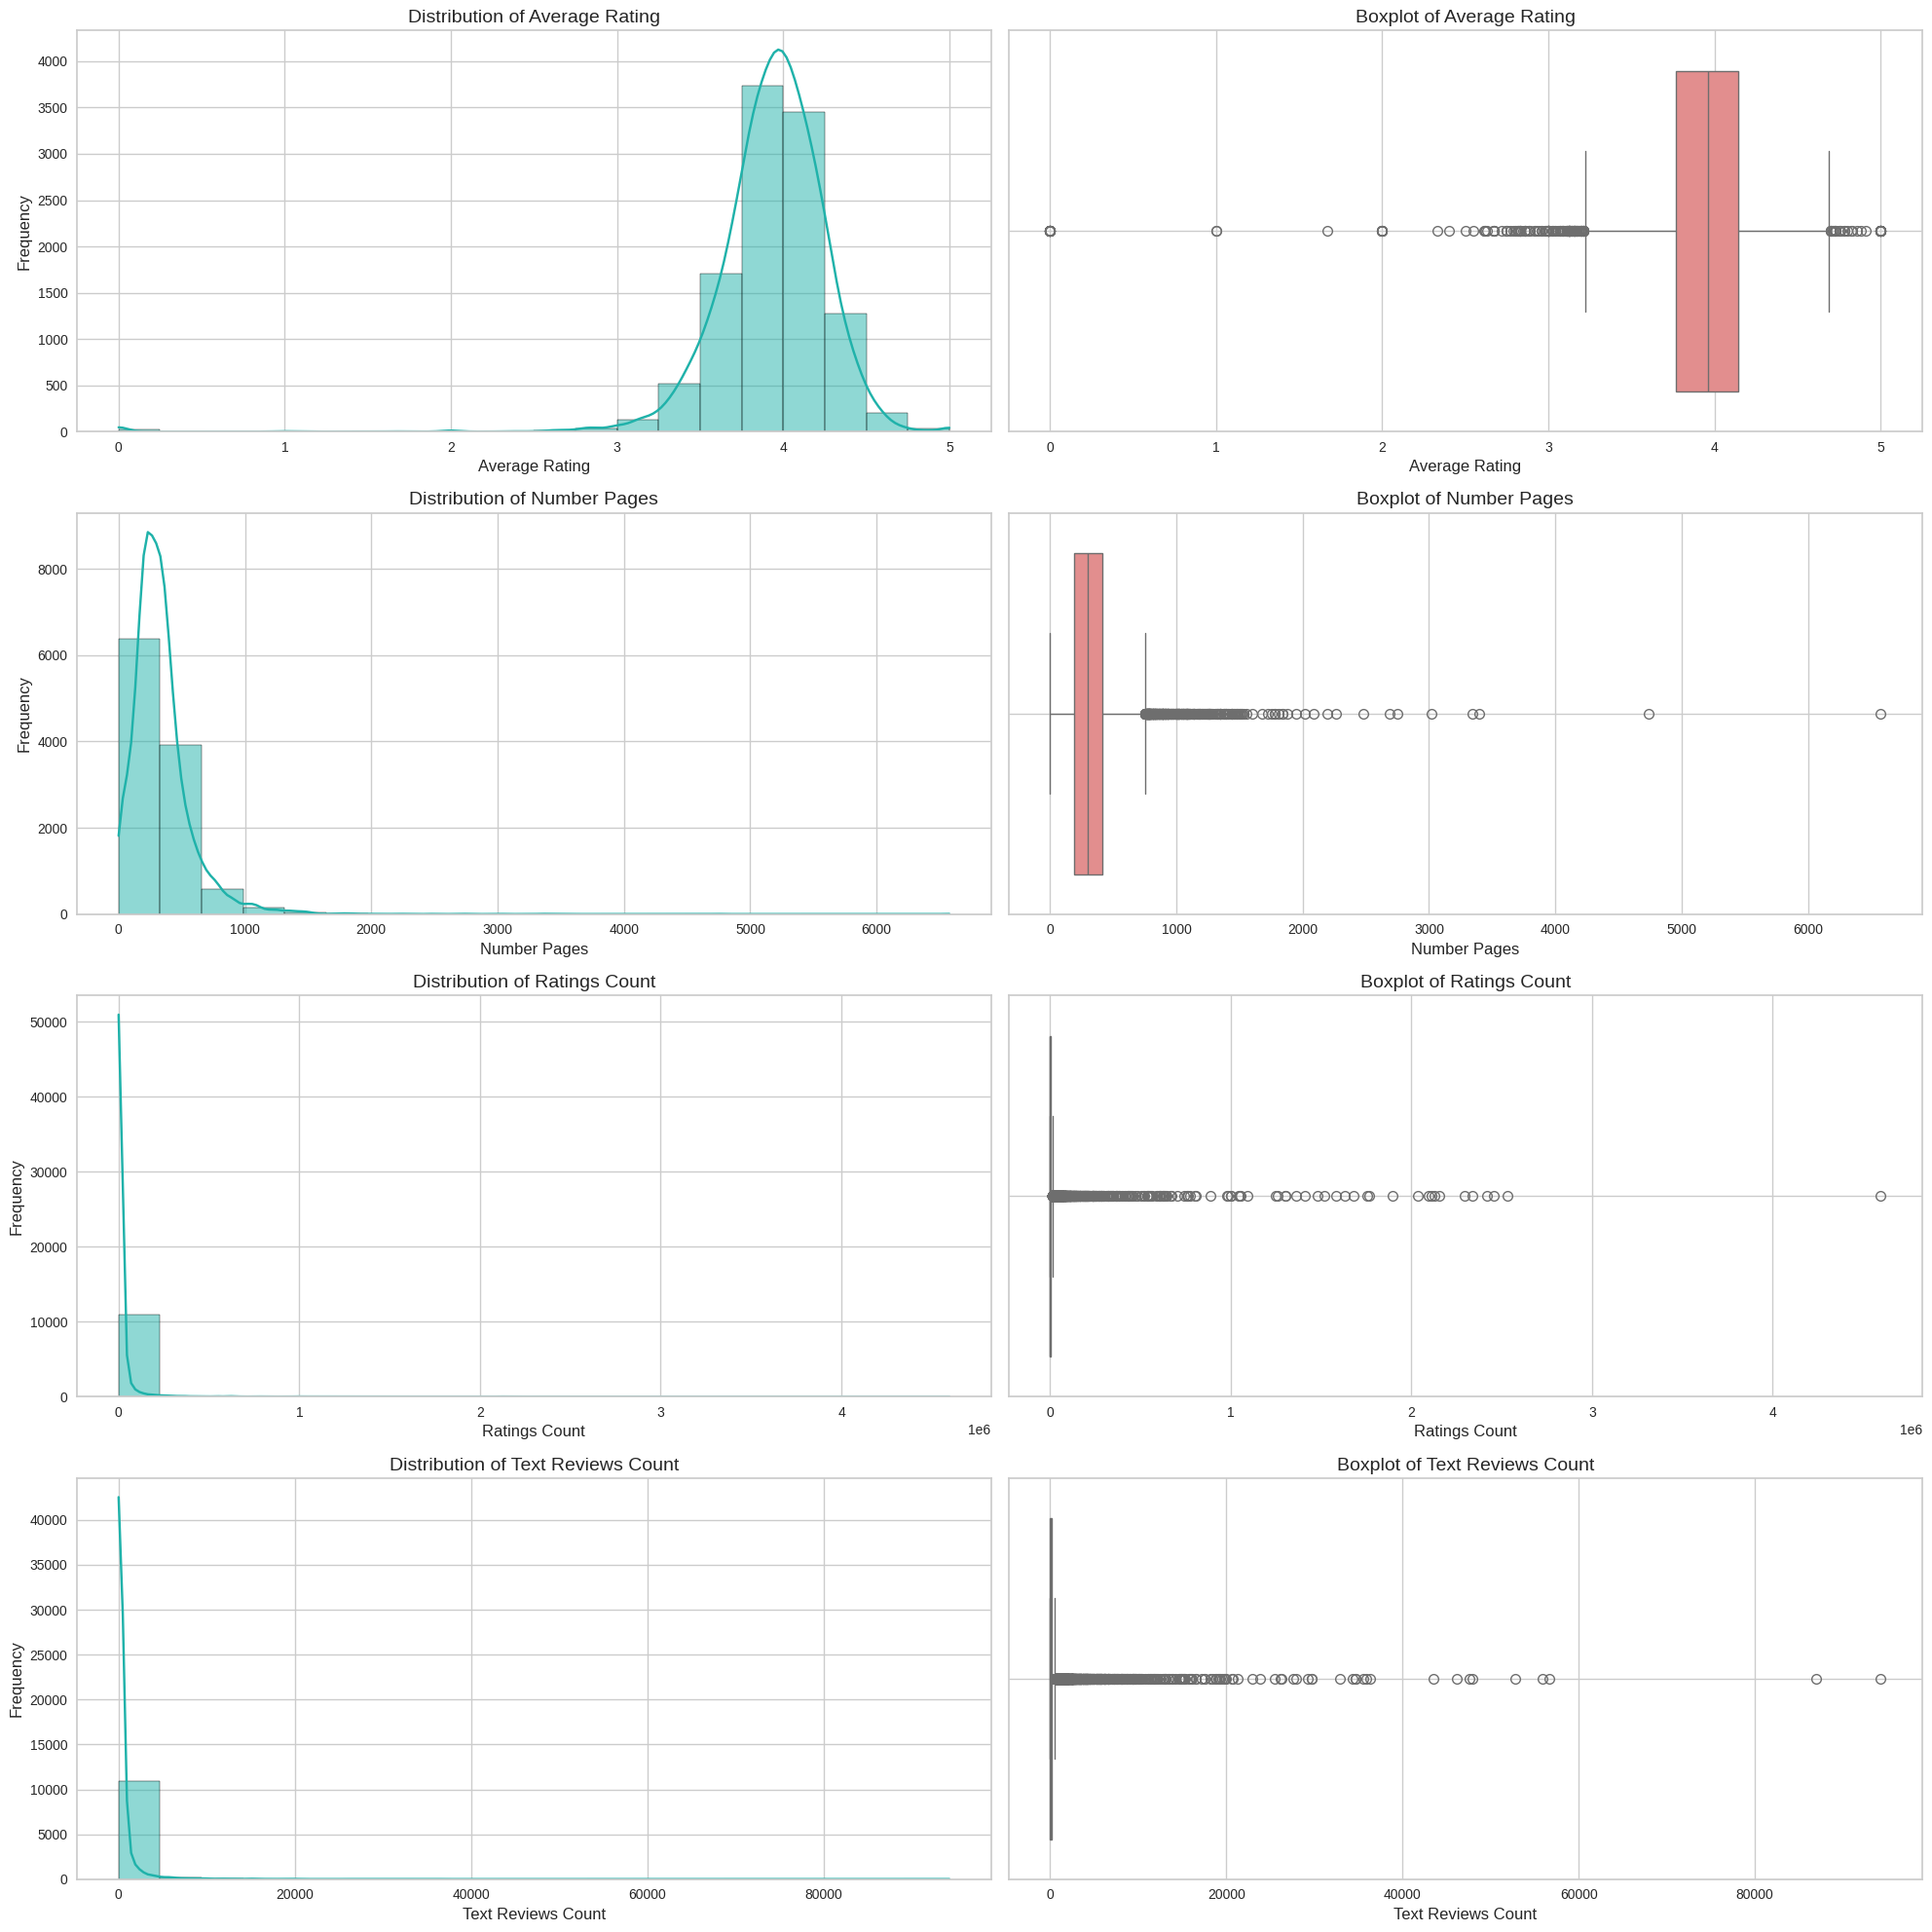

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

# Plot untuk setiap kolom
for i, col in enumerate(col_num):
    # Plot histogram dengan KDE
    sns.histplot(df[col].dropna(), kde=True, ax=ax[i, 0], color='lightseagreen', bins=20)
    ax[i, 0].set_title(f"Distribution of {col}", fontsize=14)
    ax[i, 0].set_xlabel(col, fontsize=12)
    ax[i, 0].set_ylabel('Frequency', fontsize=12)
    ax[i, 0].tick_params(axis='x', labelsize=10)
    ax[i, 0].tick_params(axis='y', labelsize=10)
    ax[i, 0].grid(True)

    # Plot boxplot
    sns.boxplot(x=df[col], ax=ax[i, 1], color='lightcoral')
    ax[i, 1].set_title(f"Boxplot of {col}", fontsize=14)
    ax[i, 1].set_xlabel(col, fontsize=12)
    ax[i, 1].tick_params(axis='x', labelsize=10)
    ax[i, 1].tick_params(axis='y', labelsize=10)
    ax[i, 1].grid(True)

plt.tight_layout()
plt.show()

1. Distribution of Average Rating
- Sebagian besar memiliki rating antara 3 hingga 5, dan puncak di rating 4. Banyak buku memiliki rating baik
- Menunjukkan ada beberapa outlier
2. Distribution of Number Pages
- Distribusi miring ke kiri (Right Skewed) sebagian besar buku memiliki sedikit halaman
- Menunjukkan bannyak outlier pada jumlah halaman banyak, ada kemungkinan adalah buku khusus
3. Distribution of Ratings Count
- Distribusi miring ke kiri (Right Skewed) sebagian besar buku memiliki sedikit rating
- Memiliki banyak outlier
4. Distribution of Text Reviews Count
- Sebagian besar buku memiliki sedikit text review
- Memiliki banyak outlier

**Analisis Korelasi**

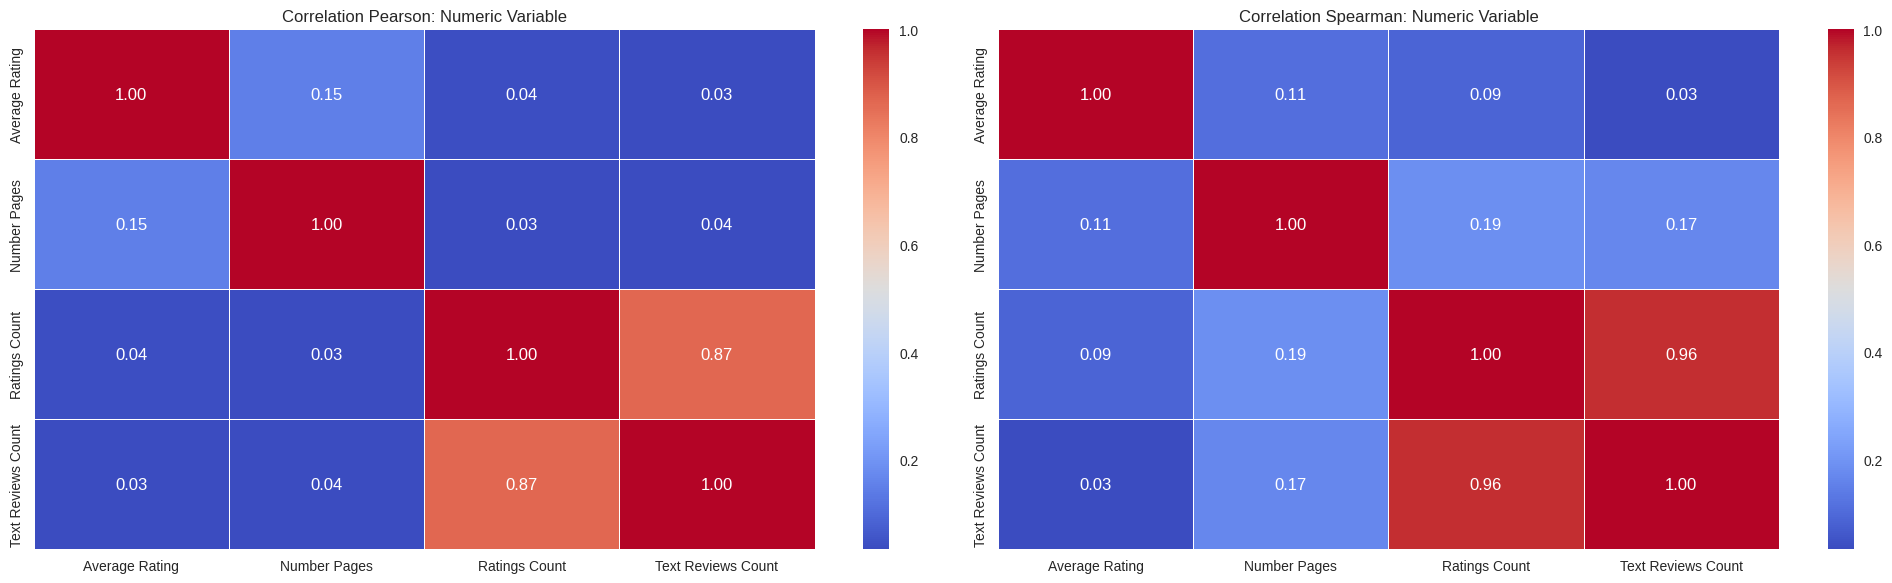

In [ ]:
pearson_corr = df[col_num].corr(method='pearson')
spearman_corr = df[col_num].corr(method='spearman')

# Membuat figure dengan dua kolom
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Heatmap Korelasi Pearson
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title('Correlation Pearson: Numeric Variable')

# Heatmap Korelasi Spearman
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title('Correlation Spearman: Numeric Variable')

# Menampilkan plot
plt.tight_layout()
plt.show()

Korelasi Pearson yang kuat (0.87) ditemukan antara **Ratings Count** dan **Text Reviews Count**, yang menunjukkan bahwa buku dengan lebih banyak rating cenderung juga memiliki lebih banyak ulasan teks.

Korelasi Spearman yang kuat (0.96) ditemukan antara **Ratings Count** dan **Text Reviews Count**, yang menunjukkan bahwa buku dengan lebih banyak rating cenderung juga memiliki lebih banyak ulasan teks.

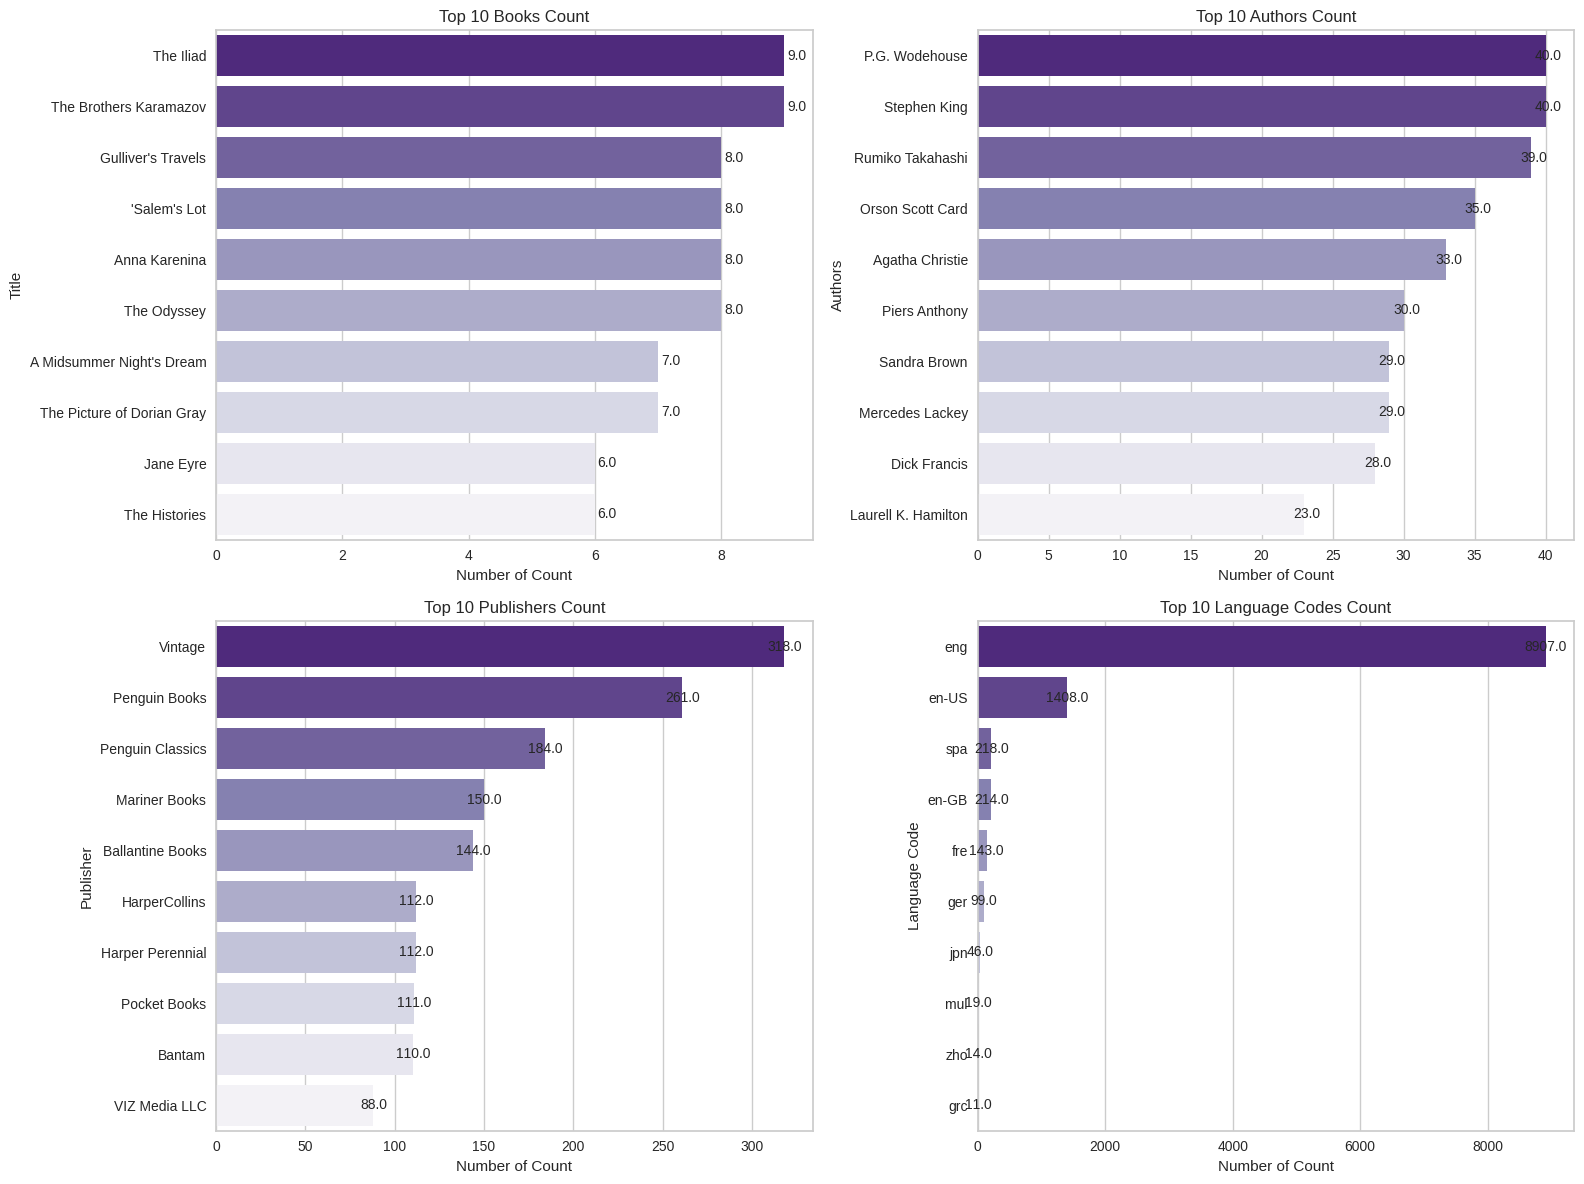

In [ ]:
# Fungsi untuk membuat bar plot dari top 10 nilai
def plot_top_10(data, column, title, ax):
    top_10 = data[column].value_counts().head(10)  # Menampilkan top 10
    sns.barplot(x=top_10.values, y=top_10.index, ax=ax, palette="Purples_r", hue=top_10.index, legend=False)
    ax.set_title(title)
    ax.set_xlabel("Number of Count")
    ax.set_ylabel(f"{column.replace('_', ' ').title()}")
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}',
                    (p.get_width() + 0.2, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', fontsize=10)

# Membuat figure dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Data dan kolom untuk tiap plot
columns = ['Title', 'Authors', 'Publisher', 'Language Code']
titles = ["Top 10 Books Count", "Top 10 Authors Count", "Top 10 Publishers Count", "Top 10 Language Codes Count"]

# Perulangan untuk menampilkan plot
for ax, column, title in zip(axes.flatten(), columns, titles):
    plot_top_10(df, column, title, ax)

# Menampilkan plot
plt.tight_layout()
plt.show()

- Books: Mayoritas buku dalam dataset berfokus pada karya-karya klasik dan penulis terkenal dengan banyak karya yang diterbitkan.
- Authors: Penulis yang mendominasi dataset ini adalah P.G. Wodehouse dan Stephen King, menunjukkan adanya konsentrasi karya pada penulis tertentu.
- Publishers: Penerbit besar seperti Vintage dan Penguin Books mendominasi, sedangkan penerbit lebih kecil memiliki kontribusi yang lebih terbatas.
- Languages: Bahasa Inggris (baik eng dan en-US) mendominasi dataset, menunjukkan bahwa buku-buku dalam bahasa Inggris lebih banyak tersedia dibandingkan dengan bahasa lain.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Missing Value dan Duplicated Data

In [ ]:
print(f"Data Duplicated: {df.duplicated().sum()}")

df.isnull().sum()

Data Duplicated: 0


,0
bookID,0
Title,0
Authors,0
Average Rating,0
isbn,0
isbn13,0
Language Code,0
Number Pages,0
Ratings Count,0
Text Reviews Count,0


## Penanganan Outlier

In [ ]:
scaler = RobustScaler()
df[col_num] = scaler.fit_transform(df[col_num])

## Transformasi Data

In [ ]:
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df[col_num] = qt.fit_transform(df[col_num])

## Encoding Data Kategorikal

In [ ]:
df['Authors_Freq'] = df['Authors'].map(df['Authors'].value_counts())
df['Publisher_Freq'] = df['Publisher'].map(df['Publisher'].value_counts())

# df = pd.get_dummies(df, columns=['Language Code'], drop_first=True)

In [ ]:
label_encoder = LabelEncoder()
df['Language Code'] = label_encoder.fit_transform(df['Language Code'])

In [ ]:
df.columns

Index(['bookID', 'Title', 'Authors', 'Average Rating', 'isbn', 'isbn13',
       'Language Code', 'Number Pages', 'Ratings Count', 'Text Reviews Count',
       'Publication Date', 'Publisher', 'Authors_Freq', 'Publisher_Freq'],
      dtype='object')

In [ ]:
X = df[[
    'Average Rating', 'Number Pages', 'Ratings Count', 'Authors_Freq', 'Publisher_Freq', 'Language Code'
]]

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

labels_all = kmeans.labels_

Disini kita menggunakan semua fitur dan menentukan k secara asal (k=3).



## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
sil_score = silhouette_score(X, labels_all)
print(f"Silhouette Score untuk k=3: {sil_score:.4f}")

Silhouette Score untuk k=3: 0.6717


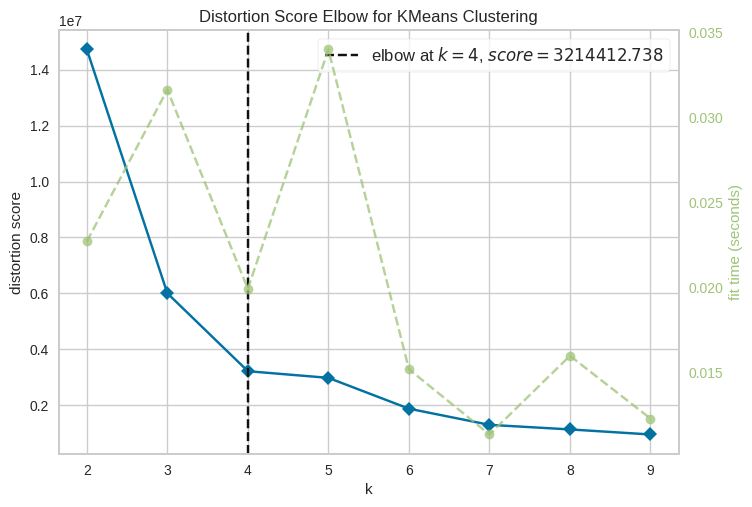

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
vizualizer = KElbowVisualizer(kmeans, k=(2,10))
vizualizer.fit(X)
vizualizer.show()

In [ ]:
# Model dengan k=4 berdasarkan k-elbow
kmeans_elbow = KMeans(n_clusters=4, random_state=42)
kmeans_elbow.fit(X)

labels_elbow = kmeans_elbow.labels_

In [ ]:
sil_score_elbow = silhouette_score(X, labels_elbow)
print(f"Silhouette Score untuk k=4 (k-elbow): {sil_score_elbow:.4f}")

Silhouette Score untuk k=4 (k-elbow): 0.6191


Silhouette score untuk k=3 lebih tinggi daripada k=4, maka kita akan memilih k=3 sebagai jumlah cluster optimal.



## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Top 10 Features Based on Importance: 
Publisher_Freq    0.938984
Ratings Count     0.017368
Number Pages      0.015057
Average Rating    0.011531
Authors_Freq      0.010466
Language Code     0.006593
dtype: float64


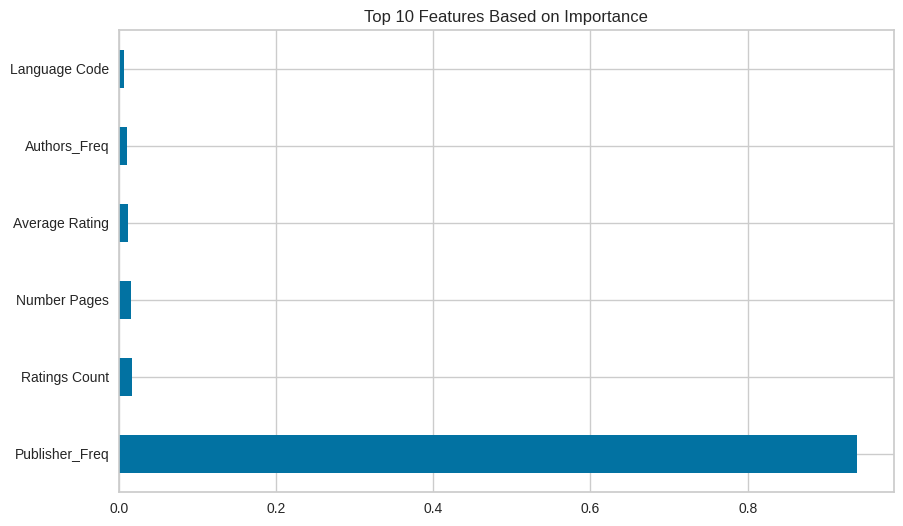

In [ ]:
# Feature Selection menggunakan ExtraTreesClassifier

# Fit model menggunakan KMeans dan dataset
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Gunakan ExtraTreesClassifier untuk mendapatkan feature importance
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X, labels)

# Mendapatkan feature importance dan menampilkan fitur yang paling penting
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

print("Top 10 Features Based on Importance: ")
print(top_features)

# Visualisasi feature importance
import matplotlib.pyplot as plt
top_features.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Features Based on Importance')
plt.show()

In [ ]:
selected_features = ['Publisher_Freq', 'Ratings Count', 'Number Pages', 'Average Rating', 'Language Code']
X_selected = X[selected_features]

kmeans_selected = KMeans(n_clusters=3, random_state=42)
labels_selected = kmeans_selected.fit_predict(X_selected)

silhouette_selected_features = silhouette_score(X_selected, labels_selected)
print(f'Silhouette Score for selected features: {silhouette_selected_features:.4f}')

Silhouette Score for selected features: 0.7148


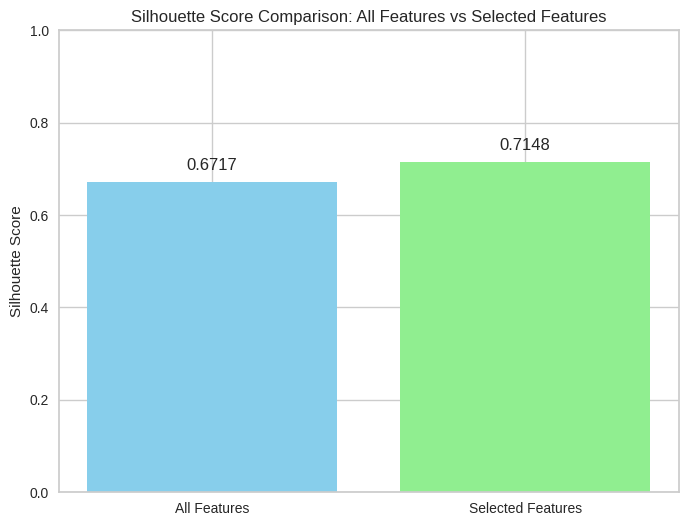

In [ ]:
sil_scores = {
    'All Features': sil_score,
    'Selected Features': silhouette_selected_features
}

# Visualisasi perbandingan menggunakan bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(sil_scores.keys(), sil_scores.values(), color=['skyblue', 'lightgreen'])
plt.title('Silhouette Score Comparison: All Features vs Selected Features')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 4), ha='center', va='bottom')

plt.show()


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


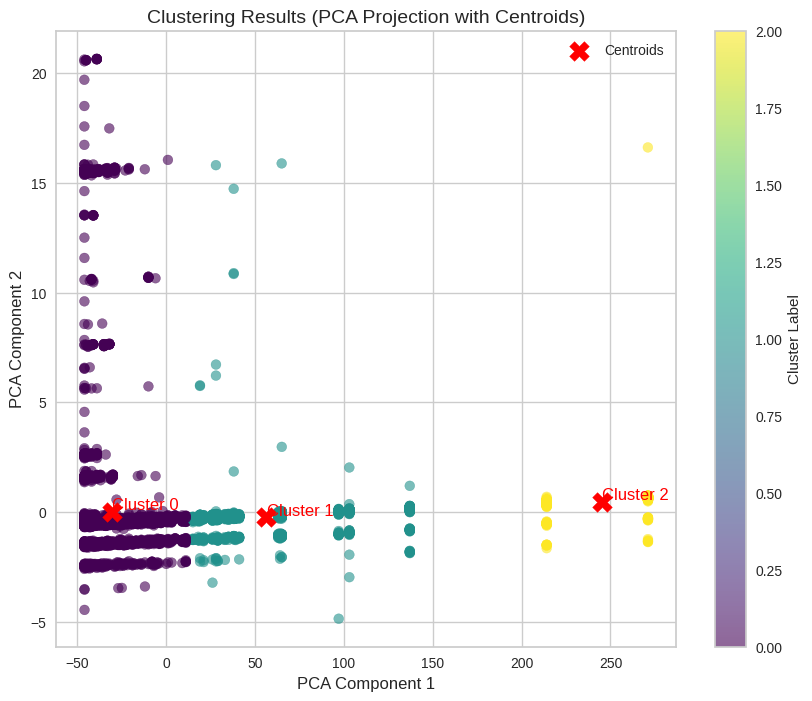

In [ ]:
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Ambil centroid hasil clustering
centroids = kmeans_selected.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_selected, cmap='viridis', s=50, alpha=0.6)
plt.title('Clustering Results (PCA Projection with Centroids)', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.colorbar(label='Cluster Label')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids_pca):
    plt.text(centroid[0] + 0.1, centroid[1] + 0.1, f'Cluster {i}', color='red', fontsize=12)

plt.legend(loc='best')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df['Cluster'] = labels_selected

In [ ]:
df.columns

Index(['bookID', 'Title', 'Authors', 'Average Rating', 'isbn', 'isbn13',
       'Language Code', 'Number Pages', 'Ratings Count', 'Text Reviews Count',
       'Publication Date', 'Publisher', 'Authors_Freq', 'Publisher_Freq',
       'Cluster'],
      dtype='object')

In [ ]:
df['Language Code'] = label_encoder.inverse_transform(df['Language Code'])

In [ ]:
df[col_num] = qt.inverse_transform(df[col_num])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
df[col_num] = scaler.inverse_transform(df[col_num])

In [ ]:
df.head()

,bookID,Title,Authors,Average Rating,isbn,isbn13,Language Code,Number Pages,Ratings Count,Text Reviews Count,Publication Date,Publisher,Authors_Freq,Publisher_Freq,Cluster
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652.0,2095690.0,27591.0,2006-09-16,Scholastic Inc.,6,13,0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870.0,2153167.0,29221.0,2004-09-01,Scholastic Inc.,6,13,0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352.0,6333.0,244.0,2003-11-01,Scholastic,11,33,0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435.0,2339585.0,36325.0,2004-05-01,Scholastic Inc.,6,13,0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690.0,41428.0,164.0,2004-09-13,Scholastic,6,33,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
X_selected['Cluster'] = labels_selected

In [ ]:
cluster_summary = X_selected.groupby('Cluster').mean()
print(cluster_summary)

         Publisher_Freq  Ratings Count  Number Pages  Average Rating  \
Cluster                                                                
0             16.590257      -0.136549     -0.079696        0.012113   
1            103.390411       0.316284      0.195353       -0.009395   
2            292.305699       0.484933      0.180086       -0.138826   

         Language Code  
Cluster                 
0             5.443869  
1             4.896771  
2             4.917098  


Tulis hasil interpretasinya di sini.
1. **Cluster 0:**
- Publisher_Freq: 16.59 <br>
Cluster ini berisi buku-buku yang diterbitkan oleh penerbit yang relatif lebih sedikit (berdasarkan frekuensi penerbitan). Buku-buku dalam cluster ini kemungkinan diterbitkan oleh penerbit yang lebih kecil atau kurang dikenal.

- Ratings Count: -0.1365 <br>
Cluster ini memiliki jumlah rating yang lebih rendah (nilai negatif menunjukkan bahwa rata-rata jumlah rating lebih rendah dibandingkan dengan rata-rata keseluruhan). Ini mungkin menunjukkan bahwa buku dalam cluster ini kurang populer atau lebih jarang mendapatkan rating.

- Number Pages: -0.0797 <br>
Rata-rata jumlah halaman buku dalam cluster ini sedikit lebih rendah dari rata-rata keseluruhan. Buku-buku di cluster ini kemungkinan memiliki panjang yang relatif lebih pendek.

- Average Rating: 0.0121 <br>
Cluster ini memiliki rata-rata rating yang sedikit lebih tinggi daripada rata-rata keseluruhan, meskipun tidak signifikan. Buku-buku dalam cluster ini mungkin memiliki rating yang cukup baik meskipun tidak banyak mendapatkan rating.

- Language Code: 5.44 <br>
Buku dalam cluster ini cenderung menggunakan bahasa yang lebih umum, atau bisa jadi bahasa yang digunakan lebih dominan di pasar.



2. **Cluster 1:**
- Publisher_Freq: 103.39 <br>
Buku-buku dalam cluster ini diterbitkan oleh penerbit yang lebih sering muncul atau lebih besar, yang menunjukkan bahwa buku-buku ini mungkin diterbitkan oleh penerbit besar atau terkenal.

- Ratings Count: 0.3163 <br>
Cluster ini memiliki jumlah rating yang lebih tinggi daripada cluster lainnya, yang menunjukkan bahwa buku dalam cluster ini lebih populer atau lebih banyak mendapatkan rating dari pembaca.

- Number Pages: 0.1955 <br>
Buku-buku dalam cluster ini memiliki jumlah halaman yang lebih banyak dibandingkan dengan cluster lainnya, menandakan bahwa mereka mungkin adalah buku yang lebih panjang atau lebih mendalam.

- Average Rating: -0.0094 <br>
Rata-rata rating untuk cluster ini sedikit lebih rendah daripada rata-rata keseluruhan. Meskipun buku dalam cluster ini banyak mendapat rating, mungkin kualitasnya tidak selalu tinggi.

- Language Code: 4.89 <br>
Buku dalam cluster ini umumnya menggunakan bahasa yang cukup umum, tetapi sedikit lebih rendah dari cluster 0.


3. **Cluster 2:**
- Publisher_Freq: 292.31 <br>
Cluster ini berisi buku yang diterbitkan oleh penerbit yang sangat sering muncul atau sangat besar. Buku dalam cluster ini mungkin berasal dari penerbit besar dengan distribusi yang luas.

- Ratings Count: 0.4849 <br>
Cluster ini memiliki jumlah rating yang paling tinggi, menunjukkan bahwa buku dalam cluster ini sangat populer dan banyak mendapatkan perhatian dari pembaca.

- Number Pages: 0.1801 <br>
Buku dalam cluster ini memiliki jumlah halaman yang sedikit lebih banyak dibandingkan dengan cluster lainnya, meskipun tidak terlalu signifikan.

- Average Rating: -0.1388 <br>
Rata-rata rating untuk cluster ini sedikit lebih rendah daripada cluster lainnya, meskipun jumlah rating yang diterima cukup banyak. Ini mungkin menunjukkan bahwa meskipun buku ini populer, kualitasnya tidak selalu optimal menurut pembaca.

- Language Code: 4.92 <br>
Buku dalam cluster ini kemungkinan menggunakan bahasa yang sangat umum atau bahkan lebih global, seperti bahasa Inggris, yang memberikan jangkauan yang lebih luas di pasar.


**Kesimpulan**:
1. Cluster 0: Buku dari penerbit kecil, sedikit lebih populer dengan rating yang cukup baik, tetapi lebih sedikit mendapat rating dan lebih pendek.

2. Cluster 1: Buku dari penerbit besar, dengan jumlah rating yang lebih tinggi dan jumlah halaman yang lebih banyak, namun ratingnya sedikit lebih rendah.

3. Cluster 2: Buku dari penerbit besar yang sangat populer, dengan banyak rating meskipun rata-rata ratingnya sedikit lebih rendah. Buku-buku ini cenderung panjang dan menggunakan bahasa yang lebih umum.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df.to_csv('books_clustered.csv', index=False)